# A Clique-Based Network Measure

In [1]:
%matplotlib inline 

import networkx as nx
import matplotlib.pyplot as plt
import itertools as it
from math import *
from operator import itemgetter
import warnings
warnings.filterwarnings('ignore')

In [2]:
def nontrivial_cliques(G):
    dd={}
    for k,v in nx.cliques_containing_node(G).items():
        counter=0
        for vv in range(len(v)):
            if len(v[vv])>2:
                counter+=1
        dd[k]=counter
    return dd

def ccnc(G):
    cdic=nontrivial_cliques(G)
    ccdic=nx.cliques_containing_node(G)
    dd={}
    cliques=[clique for clique in nx.find_cliques(G) if len(clique)>2]
    merged = list(it.chain.from_iterable(cliques))
    for k,v in ccdic.items():
        if len(cliques)!=0:
            count=0
            for vv in v:
                if len(vv)>2:
                    count+=len(vv) 
            dd[k]=count*(1./(len(cliques)*len(merged)))  
        else:
            dd[k]=0    
    return cdic, dd, G.degree() 

def sp(G):
    for v,k in ccnc(G)[0].items():
        print v,k
    print
    for v,k in ccnc(G)[1].items():
        print v,k
    print
    for v,k in ccnc(G)[2].items():
        print v,k
        
def spl(G):
    for v,k in ccnc(G)[1].items():
        print 'The clique-based measure of node', v, 'is', k

def draw_circle_around_clique(clique,coords):
    dist=0
    temp_dist=0
    center=[0 for i in range(2)]
    color=colors.next()
    for a in clique:
        for b in clique:
            temp_dist=(coords[a][0]-coords[b][0])**2+(coords[a][1]-coords[b][1])**2
            if temp_dist>dist:
                dist=temp_dist
                for i in range(2):
                    center[i]=(coords[a][i]+coords[b][i])/2
    rad=dist**0.5/2 #1.2*
#     cir = plt.Circle((center[0],center[1]),   radius=rad*1.3,fill=False,color=color,hatch=hatches.next())
    cir = plt.Circle((center[0],center[1]),   radius=rad*1.3,fill=True,color=color,alpha=0.2) #,hatch=hatches.next())
    plt.gca().add_patch(cir)
    plt.axis('scaled')
    # return color of the circle, to use it as the color for vertices of the cliques
    return color

### Definition of a clique-based measure on nodes of a graph

In an undirected grpah $G = (V,E)$, a **maximal clique** $c$ is a set of (distinct) nodes $c \subset V$ such that (i) $(i, j) \in E$, for any (distinct) $i, j \in c$, and (ii) $c$ is the maximal subset of $V$ satisfying (i).

Given an undirected graph $G$ and a node $v$ and for any clique $c \in C(v)$, we denote 
* $C(G)$, the set of all (maximal) cliques (with size $> 2$) in the graph $G$, 
* $C(v) = \{c \in C(G): v \in c\}$, the set of all (maximal) cliques containing $v$ (with size $> 2$), 
* $|c|$, the size of clique $c$ (i.e., the number of nodes in $c$).

Then a **clique-based measure** of node $v$ is defined as:
\begin{equation}
m(v) = \left\{ \begin{array}{ll}
\frac{\sum_{c \in C(v)} |c|}{\sum_{c \in C(G)} |c|}, & {\mbox{when }} C(v) \neq \varnothing, \\
0, & {\mbox{when }} C(v) = \varnothing.
\end{array}
\right.
\end{equation}

In [ ]:
from IPython.display import Image
Image(filename='formula.png') 

### Example 1: Krackhard's Silicon Systems Graph

True
21
79


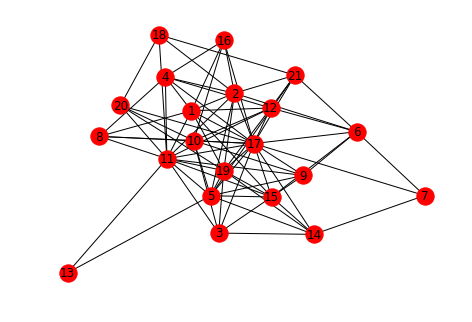

In [3]:
import csv
with open('Kfdata.csv', 'rU') as f:
    reader = csv.reader(f)
    ll = list(reader)
data=[]
for i in range(len(ll)):
    data.append((int(ll[i][0]),int(ll[i][1])))
# print data, len(data)
G = nx.Graph()   
G.add_edges_from(data)
print nx.is_connected(G)
print len(G.nodes())
print len(G.edges())  #G.edges(), 
nx.draw(G,with_labels=True)

There are 30 maximal cliques of size at least 3:
[17, 11, 8, 1, 4] with size 5
[17, 11, 9, 5, 15] with size 5
[17, 11, 19, 1, 2] with size 5
[17, 11, 19, 1, 12] with size 5
[17, 11, 19, 1, 15] with size 5
[17, 11, 19, 3, 15] with size 5
[17, 11, 19, 5, 2] with size 5
[17, 11, 19, 5, 15] with size 5
[17, 11, 4, 1, 2] with size 5
[17, 11, 4, 1, 12] with size 5
[17, 14, 15, 19, 3] with size 5
[17, 14, 15, 19, 5] with size 5
[17, 16, 1, 2, 4] with size 5
[17, 6, 9, 15] with size 4
[17, 6, 21, 2] with size 4
[17, 6, 21, 12] with size 4
[17, 10, 5, 9] with size 4
[17, 11, 19, 20] with size 4
[17, 21, 5, 2] with size 4
[17, 6, 7] with size 3
[17, 7, 14] with size 3
[17, 10, 3] with size 3
[17, 10, 8] with size 3
[17, 10, 12] with size 3
[17, 10, 16] with size 3
[17, 10, 20] with size 3
[18, 2, 11] with size 3
[18, 2, 21] with size 3
[18, 20, 11] with size 3
[13, 11, 5] with size 3


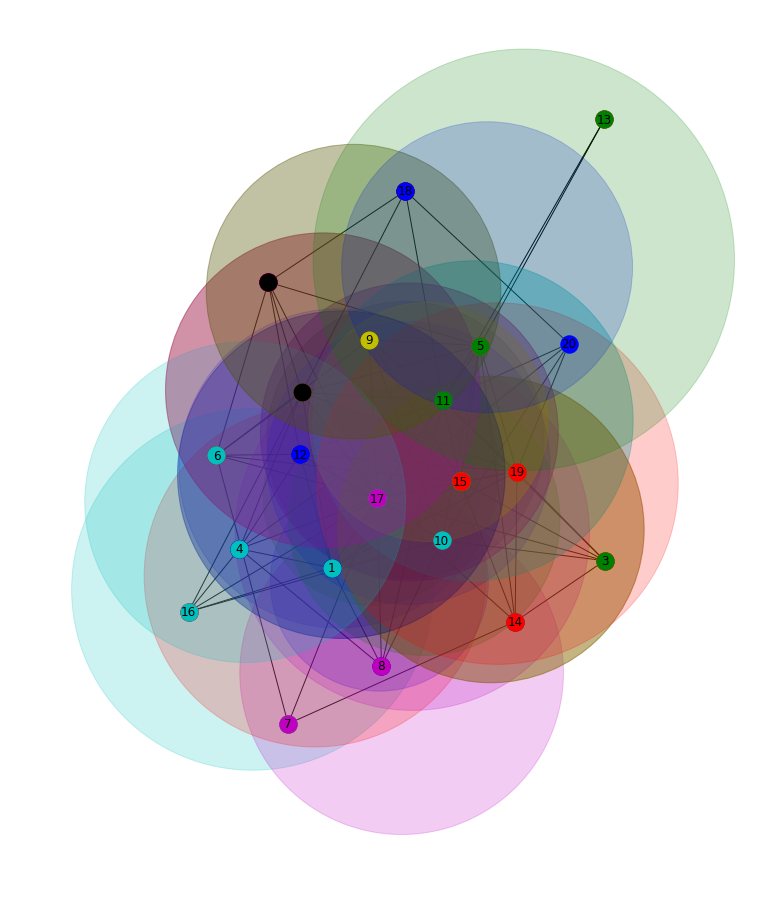

In [4]:
cliques=[clique for clique in nx.find_cliques(G) if len(clique)>2]
print 'There are', len(cliques), 'maximal cliques of size at least 3:'
b = sorted(cliques, lambda x,y: 1 if len(x)<len(y) else -1 if len(x)>len(y) else 0)
for i in b:
    print i, 'with size', len(i)

coords=nx.spring_layout(G)
global colors, hatches
colors=it.cycle('bgrcmyk')# blue, green, red, ...
plt.figure(figsize=(12,12))
nx.draw(G,pos=coords,with_labels=True)
for clique in cliques:
#     print "Clique to appear: ",clique
    nx.draw_networkx_nodes(G,pos=coords,nodelist=clique,node_color=draw_circle_around_clique(clique,coords))
# nnn=nx.draw_networkx_nodes(G,pos=coords,nodelist=sclique,node_color=draw_circle_around_clique(sclique,coords))

In [5]:
spl(G)

The clique-based measure of node 1 is 0.00956284153005
The clique-based measure of node 2 is 0.00928961748634
The clique-based measure of node 3 is 0.00355191256831
The clique-based measure of node 4 is 0.00546448087432
The clique-based measure of node 5 is 0.00846994535519
The clique-based measure of node 6 is 0.00409836065574
The clique-based measure of node 7 is 0.0016393442623
The clique-based measure of node 8 is 0.00218579234973
The clique-based measure of node 9 is 0.00355191256831
The clique-based measure of node 10 is 0.0051912568306
The clique-based measure of node 11 is 0.0172131147541
The clique-based measure of node 12 is 0.00464480874317
The clique-based measure of node 13 is 0.000819672131148
The clique-based measure of node 14 is 0.00355191256831
The clique-based measure of node 15 is 0.00928961748634
The clique-based measure of node 16 is 0.00218579234973
The clique-based measure of node 17 is 0.0300546448087
The clique-based measure of node 18 is 0.00245901639344
The 

### Example 1: Zooming in the node of minimum clique based measure

13 0.000819672131148 2
[11, 5] 2
[11, 5, 13]
index 2
1
nsize 3


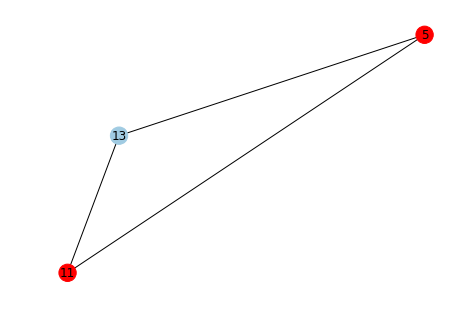

In [6]:
mv=min(ccnc(G)[1].values()) #max(ccnc(G)[1].values())
nd=ccnc(G)[1].keys()[ccnc(G)[1].values().index(mv)]
print nd, mv, G.degree(nd)
print G.neighbors(nd), len(G.neighbors(nd))
H=G.subgraph(G.neighbors(nd)+[nd])
print H.nodes()
ind=H.nodes().index(nd)
print 'index', ind
print ccnc(G)[0][nd]
k=len(H.nodes())
print 'nsize', k
# sl=[500 for i in range(k)]
# sl[ind]=1500
# sl=['o' for i in range(k)]
# sl[ind]='s'
# ssl=dict(zip(H.nodes(),sl))
cl=["#FF0000" for i in range(k)]
cl[ind]="#A0CBE2" #"#FFFF00"
# print sl
# print cl
nx.draw(H, with_labels=True,node_color=cl) #node_shape=ssl,
cdic=nx.cliques_containing_node(H)
# print cdic.values()
# print cdic[nd]
# for k,v in cdic.items():
#     print k,sorted(v, key=itemgetter(2))

### Example 1: Zooming in the node of maximum clique based measure

17 0.0300546448087 18
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 19, 20, 21] 18
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 19, 20, 21]
index 15
26
nsize 19


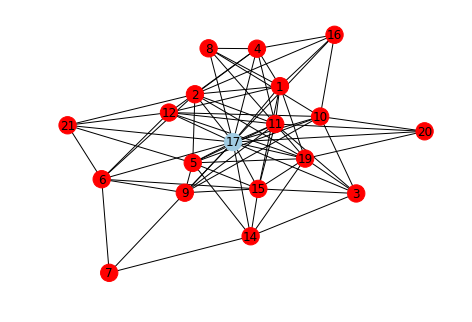

In [7]:
mv=max(ccnc(G)[1].values()) #max(ccnc(G)[1].values())
nd=ccnc(G)[1].keys()[ccnc(G)[1].values().index(mv)]
print nd, mv, G.degree(nd)
print G.neighbors(nd), len(G.neighbors(nd))
H=G.subgraph(G.neighbors(nd)+[nd])
print H.nodes()
ind=H.nodes().index(nd)
print 'index', ind
print ccnc(G)[0][nd]
k=len(H.nodes())
print 'nsize', k
# sl=[500 for i in range(k)]
# sl[ind]=1500
# sl=['o' for i in range(k)]
# sl[ind]='s'
# ssl=dict(zip(H.nodes(),sl))
cl=["#FF0000" for i in range(k)]
cl[ind]="#A0CBE2" #"#FFFF00"
# print sl
# print cl
nx.draw(H, with_labels=True,node_color=cl) #node_shape=ssl,
cdic=nx.cliques_containing_node(H)
# print cdic.values()
# print cdic[nd]
# for k,v in cdic.items():
#     print k,sorted(v, key=itemgetter(2))

### Example 2: A Gnm Random Graph

True
20
40
There are 10 maximal cliques of size at least 3:
[3, 9, 4] with size 3
[4, 8, 9] with size 3
[7, 2, 10] with size 3
[7, 2, 14] with size 3
[11, 18, 13] with size 3
[19, 1, 16] with size 3
[19, 1, 6] with size 3
[19, 2, 10] with size 3
[19, 5, 15] with size 3
[19, 15, 16] with size 3


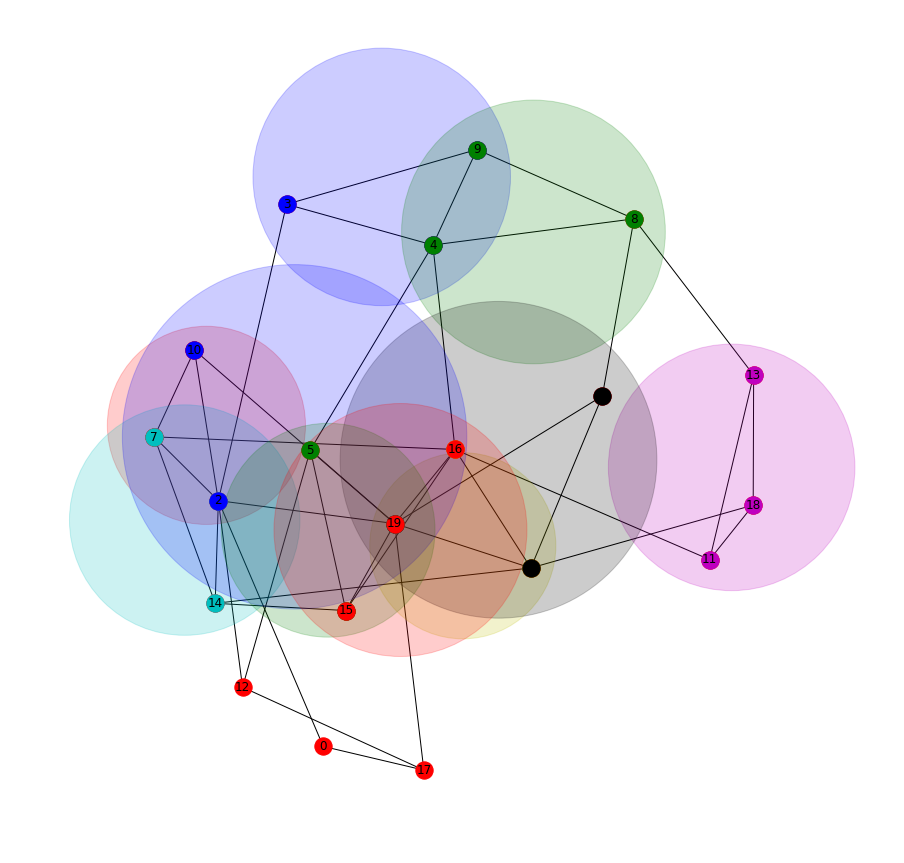

In [8]:
number_of_nodes = 20
number_of_edges = 40

# G=nx.gnm_random_graph(number_of_nodes,number_of_edges)  

while True:
    G=nx.gnm_random_graph(number_of_nodes,number_of_edges)  
    if nx.number_connected_components(G)==1:
        break
        
print nx.is_connected(G)
print len(G.nodes())
print len(G.edges())

cliques=[clique for clique in nx.find_cliques(G) if len(clique)>2]
print 'There are', len(cliques), 'maximal cliques of size at least 3:'
b = sorted(cliques, lambda x,y: 1 if len(x)<len(y) else -1 if len(x)>len(y) else 0)
for i in b:
    print i, 'with size', len(i)

coords=nx.spring_layout(G)
global colors, hatches
colors=it.cycle('bgrcmyk')# blue, green, red, ...
plt.figure(figsize=(12,12))
nx.draw(G,pos=coords,with_labels=True)
for clique in cliques:
#     print "Clique to appear: ",clique
    nx.draw_networkx_nodes(G,pos=coords,nodelist=clique,node_color=draw_circle_around_clique(clique,coords))
# nnn=nx.draw_networkx_nodes(G,pos=coords,nodelist=sclique,node_color=draw_circle_around_clique(sclique,coords))

In [9]:
spl(G)

The clique-based measure of node 0 is 0.0
The clique-based measure of node 1 is 0.02
The clique-based measure of node 2 is 0.03
The clique-based measure of node 3 is 0.01
The clique-based measure of node 4 is 0.02
The clique-based measure of node 5 is 0.01
The clique-based measure of node 6 is 0.01
The clique-based measure of node 7 is 0.02
The clique-based measure of node 8 is 0.01
The clique-based measure of node 9 is 0.02
The clique-based measure of node 10 is 0.02
The clique-based measure of node 11 is 0.01
The clique-based measure of node 12 is 0.0
The clique-based measure of node 13 is 0.01
The clique-based measure of node 14 is 0.01
The clique-based measure of node 15 is 0.02
The clique-based measure of node 16 is 0.02
The clique-based measure of node 17 is 0.0
The clique-based measure of node 18 is 0.01
The clique-based measure of node 19 is 0.05


### Example 2: Zooming in the node of minimum clique based measure

0 0.0 2
[17, 2] 2
[0, 17, 2]
index 0
0
nsize 3


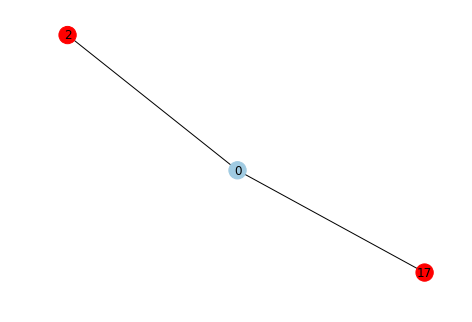

In [10]:
mv=min(ccnc(G)[1].values()) #max(ccnc(G)[1].values())
nd=ccnc(G)[1].keys()[ccnc(G)[1].values().index(mv)]
print nd, mv, G.degree(nd)
print G.neighbors(nd), len(G.neighbors(nd))
H=G.subgraph(G.neighbors(nd)+[nd])
print H.nodes()
ind=H.nodes().index(nd)
print 'index', ind
print ccnc(G)[0][nd]
k=len(H.nodes())
print 'nsize', k
# sl=[500 for i in range(k)]
# sl[ind]=1500
# sl=['o' for i in range(k)]
# sl[ind]='s'
# ssl=dict(zip(H.nodes(),sl))
cl=["#FF0000" for i in range(k)]
cl[ind]="#A0CBE2" #"#FFFF00"
# print sl
# print cl
nx.draw(H, with_labels=True,node_color=cl) #node_shape=ssl,

### Example 2: Zooming in the node of maximum clique based measure

19 0.05 8
[1, 2, 5, 6, 10, 15, 16, 17] 8
[1, 2, 5, 6, 10, 15, 16, 17, 19]
index 8
5
nsize 9


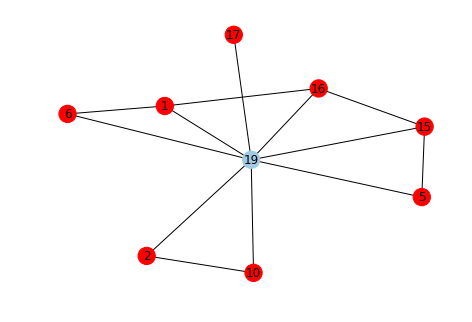

In [11]:
mv=max(ccnc(G)[1].values()) #max(ccnc(G)[1].values())
nd=ccnc(G)[1].keys()[ccnc(G)[1].values().index(mv)]
print nd, mv, G.degree(nd)
print G.neighbors(nd), len(G.neighbors(nd))
H=G.subgraph(G.neighbors(nd)+[nd])
print H.nodes()
ind=H.nodes().index(nd)
print 'index', ind
print ccnc(G)[0][nd]
k=len(H.nodes())
print 'nsize', k
# sl=[500 for i in range(k)]
# sl[ind]=1500
# sl=['o' for i in range(k)]
# sl[ind]='s'
# ssl=dict(zip(H.nodes(),sl))
cl=["#FF0000" for i in range(k)]
cl[ind]="#A0CBE2" #"#FFFF00"
# print sl
# print cl
nx.draw(H, with_labels=True,node_color=cl) #node_shape=ssl,
cdic=nx.cliques_containing_node(H)
# print cdic.values()
# print cdic[nd]
# for k,v in cdic.items():
#     print k,sorted(v, key=itemgetter(2))

### Example 3: A small graph

{0: [[1, 0, 3, 2], [1, 0, 3, 6]], 1: [[1, 0, 3, 2], [1, 0, 3, 6], [1, 4]], 2: [[1, 0, 3, 2]], 3: [[1, 0, 3, 2], [1, 0, 3, 6]], 4: [[1, 4], [5, 7, 4]], 5: [[5, 7, 4], [5, 7, 6]], 6: [[1, 0, 3, 6], [5, 7, 6]], 7: [[5, 7, 4], [5, 7, 6]]}
cliques [[1, 0, 3, 2], [1, 0, 3, 6], [5, 7, 4], [5, 7, 6]]
merged [1, 0, 3, 2, 1, 0, 3, 6, 5, 7, 4, 5, 7, 6]
total no of cliques in the graph = 4
56

The clique-based measure of node 0 is 0.142857142857
The clique-based measure of node 1 is 0.142857142857
The clique-based measure of node 2 is 0.0714285714286
The clique-based measure of node 3 is 0.142857142857
The clique-based measure of node 4 is 0.0535714285714
The clique-based measure of node 5 is 0.107142857143
The clique-based measure of node 6 is 0.125
The clique-based measure of node 7 is 0.107142857143
None
There are 4 maximal cliques of size at least 3:
[1, 0, 3, 2] with size 4
[1, 0, 3, 6] with size 4
[5, 7, 4] with size 3
[5, 7, 6] with size 3


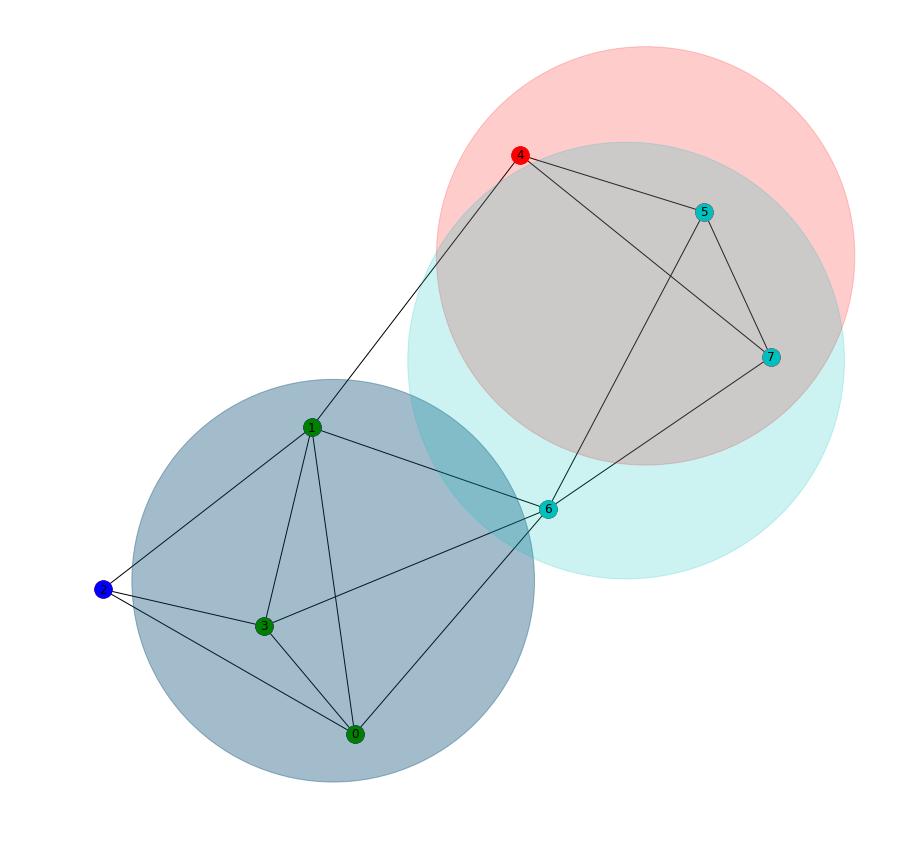

In [12]:
G=nx.Graph()
G.add_edges_from([(0,1),(0,2),(0,3),(0,6),(1,2),(1,3),(1,6),(1,4),(2,3),(3,6),(4,5),(4,7),(5,6),(5,7),(6,7)])
print nx.cliques_containing_node(G)
cliques=[clique for clique in nx.find_cliques(G) if len(clique)>2]
merged = list(it.chain.from_iterable(cliques))
print 'cliques', cliques
print 'merged', merged
print 'total no of cliques in the graph =', len(cliques)
print len(cliques)*len(merged)
print
print spl(G)
cliques=[clique for clique in nx.find_cliques(G) if len(clique)>2]
print 'There are', len(cliques), 'maximal cliques of size at least 3:'
b = sorted(cliques, lambda x,y: 1 if len(x)<len(y) else -1 if len(x)>len(y) else 0)
for i in b:
    print i, 'with size', len(i)

coords=nx.spring_layout(G)
global colors, hatches
colors=it.cycle('bgrcmyk')# blue, green, red, ...
plt.figure(figsize=(12,12))
nx.draw(G,pos=coords,with_labels=True)
for clique in cliques:
#     print "Clique to appear: ",clique
    nx.draw_networkx_nodes(G,pos=coords,nodelist=clique,node_color=draw_circle_around_clique(clique,coords))
# nnn=nx.draw_networkx_nodes(G,pos=coords,nodelist=sclique,node_color=draw_circle_around_clique(sclique,coords))

### Example 4: A dyad

There are 0 maximal cliques of size at least 3:
The clique-based measure of node 0 is 0
The clique-based measure of node 1 is 0


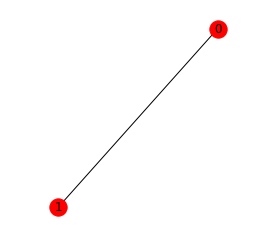

In [13]:
G=nx.star_graph(1)
cliques=[clique for clique in nx.find_cliques(G) if len(clique)>2]
print 'There are', len(cliques), 'maximal cliques of size at least 3:'
b = sorted(cliques, lambda x,y: 1 if len(x)<len(y) else -1 if len(x)>len(y) else 0)
for i in b:
    print i, 'with size', len(i)
spl(G)

coords=nx.spring_layout(G)
global colors, hatches
colors=it.cycle('bgrcmyk')# blue, green, red, ...
plt.figure(figsize=(3,3))
nx.draw(G,pos=coords,with_labels=True)
for clique in cliques:
#     print "Clique to appear: ",clique
    nx.draw_networkx_nodes(G,pos=coords,nodelist=clique,node_color=draw_circle_around_clique(clique,coords))
# nnn=nx.draw_networkx_nodes(G,pos=coords,nodelist=sclique,node_color=draw_circle_around_clique(sclique,coords))

### Example 5: A path graph

There are 0 maximal cliques of size at least 3:
The clique-based measure of node 0 is 0
The clique-based measure of node 1 is 0
The clique-based measure of node 2 is 0
The clique-based measure of node 3 is 0
The clique-based measure of node 4 is 0
The clique-based measure of node 5 is 0


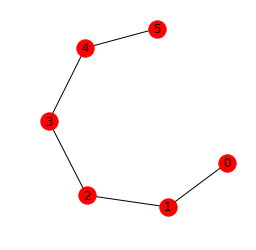

In [14]:
G=nx.path_graph(6)
cliques=[clique for clique in nx.find_cliques(G) if len(clique)>2]
print 'There are', len(cliques), 'maximal cliques of size at least 3:'
b = sorted(cliques, lambda x,y: 1 if len(x)<len(y) else -1 if len(x)>len(y) else 0)
for i in b:
    print i, 'with size', len(i)
spl(G)

coords=nx.spring_layout(G)
global colors, hatches
colors=it.cycle('bgrcmyk')# blue, green, red, ...
plt.figure(figsize=(3,3))
nx.draw(G,pos=coords,with_labels=True)
for clique in cliques:
#     print "Clique to appear: ",clique
    nx.draw_networkx_nodes(G,pos=coords,nodelist=clique,node_color=draw_circle_around_clique(clique,coords))
# nnn=nx.draw_networkx_nodes(G,pos=coords,nodelist=sclique,node_color=draw_circle_around_clique(sclique,coords))

### Example 6: Two stars

There are 0 maximal cliques of size at least 3:
The clique-based measure of node 0 is 0
The clique-based measure of node 1 is 0
The clique-based measure of node 2 is 0
The clique-based measure of node 3 is 0


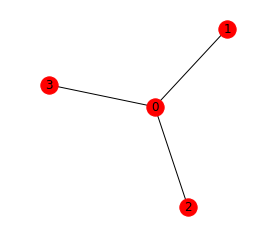

In [15]:
G=nx.star_graph(3)
cliques=[clique for clique in nx.find_cliques(G) if len(clique)>2]
print 'There are', len(cliques), 'maximal cliques of size at least 3:'
b = sorted(cliques, lambda x,y: 1 if len(x)<len(y) else -1 if len(x)>len(y) else 0)
for i in b:
    print i, 'with size', len(i)
spl(G)

coords=nx.spring_layout(G)
global colors, hatches
colors=it.cycle('bgrcmyk')# blue, green, red, ...
plt.figure(figsize=(3,3))
nx.draw(G,pos=coords,with_labels=True)
for clique in cliques:
#     print "Clique to appear: ",clique
    nx.draw_networkx_nodes(G,pos=coords,nodelist=clique,node_color=draw_circle_around_clique(clique,coords))
# nnn=nx.draw_networkx_nodes(G,pos=coords,nodelist=sclique,node_color=draw_circle_around_clique(sclique,coords))

There are 0 maximal cliques of size at least 3:
The clique-based measure of node 0 is 0
The clique-based measure of node 1 is 0
The clique-based measure of node 2 is 0
The clique-based measure of node 3 is 0
The clique-based measure of node 4 is 0
The clique-based measure of node 5 is 0
The clique-based measure of node 6 is 0
The clique-based measure of node 7 is 0
The clique-based measure of node 8 is 0
The clique-based measure of node 9 is 0


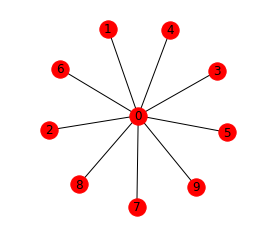

In [16]:
G=nx.star_graph(9)
cliques=[clique for clique in nx.find_cliques(G) if len(clique)>2]
print 'There are', len(cliques), 'maximal cliques of size at least 3:'
b = sorted(cliques, lambda x,y: 1 if len(x)<len(y) else -1 if len(x)>len(y) else 0)
for i in b:
    print i, 'with size', len(i)
spl(G)

coords=nx.spring_layout(G)
global colors, hatches
colors=it.cycle('bgrcmyk')# blue, green, red, ...
plt.figure(figsize=(3,3))
nx.draw(G,pos=coords,with_labels=True)
for clique in cliques:
#     print "Clique to appear: ",clique
    nx.draw_networkx_nodes(G,pos=coords,nodelist=clique,node_color=draw_circle_around_clique(clique,coords))
# nnn=nx.draw_networkx_nodes(G,pos=coords,nodelist=sclique,node_color=draw_circle_around_clique(sclique,coords))

### Example 7: An ego with one pair of connected alters

There are 1 maximal cliques of size at least 3:
[0, 2, 3] with size 3
The clique-based measure of node 0 is 1.0
The clique-based measure of node 1 is 0.0
The clique-based measure of node 2 is 1.0
The clique-based measure of node 3 is 1.0
The clique-based measure of node 4 is 0.0
The clique-based measure of node 5 is 0.0
The clique-based measure of node 6 is 0.0
The clique-based measure of node 7 is 0.0
The clique-based measure of node 8 is 0.0
The clique-based measure of node 9 is 0.0


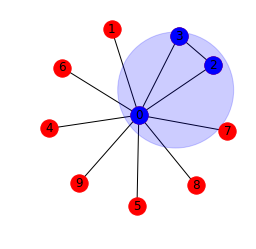

In [17]:
G.add_edge(2,3)
cliques=[clique for clique in nx.find_cliques(G) if len(clique)>2]
print 'There are', len(cliques), 'maximal cliques of size at least 3:'
b = sorted(cliques, lambda x,y: 1 if len(x)<len(y) else -1 if len(x)>len(y) else 0)
for i in b:
    print i, 'with size', len(i)
spl(G)

coords=nx.spring_layout(G)
global colors, hatches
colors=it.cycle('bgrcmyk')# blue, green, red, ...
plt.figure(figsize=(3,3))
nx.draw(G,pos=coords,with_labels=True)
for clique in cliques:
#     print "Clique to appear: ",clique
    nx.draw_networkx_nodes(G,pos=coords,nodelist=clique,node_color=draw_circle_around_clique(clique,coords))
# nnn=nx.draw_networkx_nodes(G,pos=coords,nodelist=sclique,node_color=draw_circle_around_clique(sclique,coords))

### Example 8: An ego with two pairs of connected alters

There are 2 maximal cliques of size at least 3:
[0, 2, 1] with size 3
[0, 2, 3] with size 3
The clique-based measure of node 0 is 0.5
The clique-based measure of node 1 is 0.25
The clique-based measure of node 2 is 0.5
The clique-based measure of node 3 is 0.25
The clique-based measure of node 4 is 0.0
The clique-based measure of node 5 is 0.0
The clique-based measure of node 6 is 0.0
The clique-based measure of node 7 is 0.0
The clique-based measure of node 8 is 0.0
The clique-based measure of node 9 is 0.0


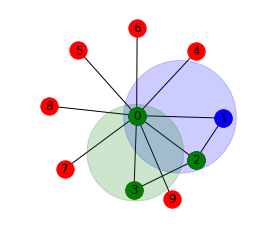

In [18]:
G.add_edge(1,2)
cliques=[clique for clique in nx.find_cliques(G) if len(clique)>2]
print 'There are', len(cliques), 'maximal cliques of size at least 3:'
b = sorted(cliques, lambda x,y: 1 if len(x)<len(y) else -1 if len(x)>len(y) else 0)
for i in b:
    print i, 'with size', len(i)
spl(G)

coords=nx.spring_layout(G)
global colors, hatches
colors=it.cycle('bgrcmyk')# blue, green, red, ...
plt.figure(figsize=(3,3))
nx.draw(G,pos=coords,with_labels=True)
for clique in cliques:
#     print "Clique to appear: ",clique
    nx.draw_networkx_nodes(G,pos=coords,nodelist=clique,node_color=draw_circle_around_clique(clique,coords))
# nnn=nx.draw_networkx_nodes(G,pos=coords,nodelist=sclique,node_color=draw_circle_around_clique(sclique,coords))

### Example 9: An ego with three pairs of connected alters

There are 3 maximal cliques of size at least 3:
[0, 2, 1] with size 3
[0, 2, 3] with size 3
[0, 4, 3] with size 3
The clique-based measure of node 0 is 0.333333333333
The clique-based measure of node 1 is 0.111111111111
The clique-based measure of node 2 is 0.222222222222
The clique-based measure of node 3 is 0.222222222222
The clique-based measure of node 4 is 0.111111111111
The clique-based measure of node 5 is 0.0
The clique-based measure of node 6 is 0.0
The clique-based measure of node 7 is 0.0
The clique-based measure of node 8 is 0.0
The clique-based measure of node 9 is 0.0


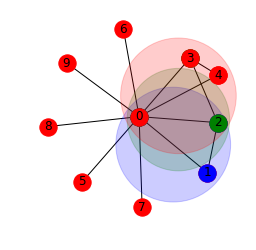

In [19]:
G.add_edge(3,4)
cliques=[clique for clique in nx.find_cliques(G) if len(clique)>2]
print 'There are', len(cliques), 'maximal cliques of size at least 3:'
b = sorted(cliques, lambda x,y: 1 if len(x)<len(y) else -1 if len(x)>len(y) else 0)
for i in b:
    print i, 'with size', len(i)
spl(G)

coords=nx.spring_layout(G)
global colors, hatches
colors=it.cycle('bgrcmyk')# blue, green, red, ...
plt.figure(figsize=(3,3))
nx.draw(G,pos=coords,with_labels=True)
for clique in cliques:
#     print "Clique to appear: ",clique
    nx.draw_networkx_nodes(G,pos=coords,nodelist=clique,node_color=draw_circle_around_clique(clique,coords))
# nnn=nx.draw_networkx_nodes(G,pos=coords,nodelist=sclique,node_color=draw_circle_around_clique(sclique,coords))

In [20]:
# print 'There are', len(cliques), 'maximal cliques of size at least 3:'
# print cliques
# print
# spl(G)

### Example 10: A 5-clique

There are 1 maximal cliques of size at least 3:
[0, 1, 2, 3, 4] with size 5
The clique-based measure of node 0 is 1.0
The clique-based measure of node 1 is 1.0
The clique-based measure of node 2 is 1.0
The clique-based measure of node 3 is 1.0
The clique-based measure of node 4 is 1.0


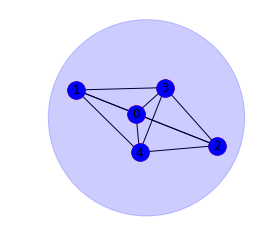

In [21]:
G=nx.complete_graph(5)
cliques=[clique for clique in nx.find_cliques(G) if len(clique)>2]
print 'There are', len(cliques), 'maximal cliques of size at least 3:'
b = sorted(cliques, lambda x,y: 1 if len(x)<len(y) else -1 if len(x)>len(y) else 0)
for i in b:
    print i, 'with size', len(i)
spl(G)

coords=nx.spring_layout(G)
global colors, hatches
colors=it.cycle('bgrcmyk')# blue, green, red, ...
plt.figure(figsize=(3,3))
nx.draw(G,pos=coords,with_labels=True)
for clique in cliques:
#     print "Clique to appear: ",clique
    nx.draw_networkx_nodes(G,pos=coords,nodelist=clique,node_color=draw_circle_around_clique(clique,coords))
# nnn=nx.draw_networkx_nodes(G,pos=coords,nodelist=sclique,node_color=draw_circle_around_clique(sclique,coords))

### Example 11: A 5-clique with a spike

There are 1 maximal cliques of size at least 3:
[4, 0, 1, 2, 3] with size 5
The clique-based measure of node 0 is 1.0
The clique-based measure of node 1 is 1.0
The clique-based measure of node 2 is 1.0
The clique-based measure of node 3 is 1.0
The clique-based measure of node 4 is 1.0
The clique-based measure of node 5 is 0.0


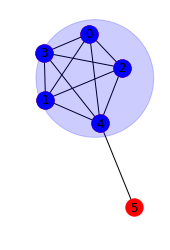

In [22]:
G=nx.complete_graph(5)
G.add_edge(4,5)
cliques=[clique for clique in nx.find_cliques(G) if len(clique)>2]
print 'There are', len(cliques), 'maximal cliques of size at least 3:'
b = sorted(cliques, lambda x,y: 1 if len(x)<len(y) else -1 if len(x)>len(y) else 0)
for i in b:
    print i, 'with size', len(i)
spl(G)

coords=nx.spring_layout(G)
global colors, hatches
colors=it.cycle('bgrcmyk')# blue, green, red, ...
plt.figure(figsize=(3,3))
nx.draw(G,pos=coords,with_labels=True)
for clique in cliques:
#     print "Clique to appear: ",clique
    nx.draw_networkx_nodes(G,pos=coords,nodelist=clique,node_color=draw_circle_around_clique(clique,coords))
# nnn=nx.draw_networkx_nodes(G,pos=coords,nodelist=sclique,node_color=draw_circle_around_clique(sclique,coords))